In [2]:
import akshare as ak
import pandas as pd
import pyfolio as pf

D:\Anaconda\lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
# 沪深 300 指数收益率×40%+中证港股通综合指数（人民币）收益率×20%+上证国债指数收益率×40%

In [4]:
df_ruihe = ak.fund_open_fund_info_em(symbol="501062",indicator='累计净值走势')
df_300 = ak.index_zh_a_hist(symbol="000300", period="daily")
df_ggt = ak.index_zh_a_hist(symbol="930930", period="daily")
df_shguozhai = ak.index_zh_a_hist(symbol="000012", period="daily")

In [5]:
df_ruihe.index=pd.to_datetime(df_ruihe['净值日期'])
df_300.index=pd.to_datetime(df_300['日期'])
df_ggt.index=pd.to_datetime(df_ggt['日期'])
df_shguozhai.index=pd.to_datetime(df_shguozhai['日期'])

In [6]:
df_temp1 = pd.merge(df_ruihe,df_300[['涨跌幅']],left_index=True, right_index=True,how='inner')
df_temp1.rename(columns={"涨跌幅":"300涨跌幅"},inplace=True)
df_temp1 = pd.merge(df_temp1,df_ggt[['涨跌幅']],left_index=True, right_index=True,how='inner')
df_temp1.rename(columns={"涨跌幅":"港股通涨跌幅"},inplace=True)
df_temp1 = pd.merge(df_temp1,df_shguozhai[['涨跌幅']],left_index=True, right_index=True,how='inner')
df_temp1.rename(columns={"涨跌幅":"上证国债涨跌幅"},inplace=True)
df_temp1['基金涨跌幅'] = df_temp1[['累计净值']].pct_change()
df_temp1['基准涨跌幅'] = (df_temp1['300涨跌幅']*0.4+df_temp1['港股通涨跌幅']*0.2+df_temp1['上证国债涨跌幅']*0.4)/100
df_temp1.dropna(inplace=True)

Start date,2018-09-07
End date,2024-09-13
Total months,65
,Backtest
Annual return,8.679%
Cumulative returns,57.43%
Annual volatility,14.533%
Sharpe ratio,0.65
Calmar ratio,0.44
Stability,0.57
Max drawdown,-19.847%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.40,2021-02-10,2024-02-02,NaT,NaN
1,13.63,2020-02-25,2020-03-20,2020-06-29,90
2,7.24,2019-04-01,2019-06-05,2019-08-23,105
4,5.06,2020-08-06,2020-10-22,2020-11-05,66
3,3.14,2020-07-13,2020-07-15,2020-08-05,18


Stress Events,mean,min,max
New Normal,0.14%,-0.02%,0.44%
Covid,0.02%,-4.52%,3.34%


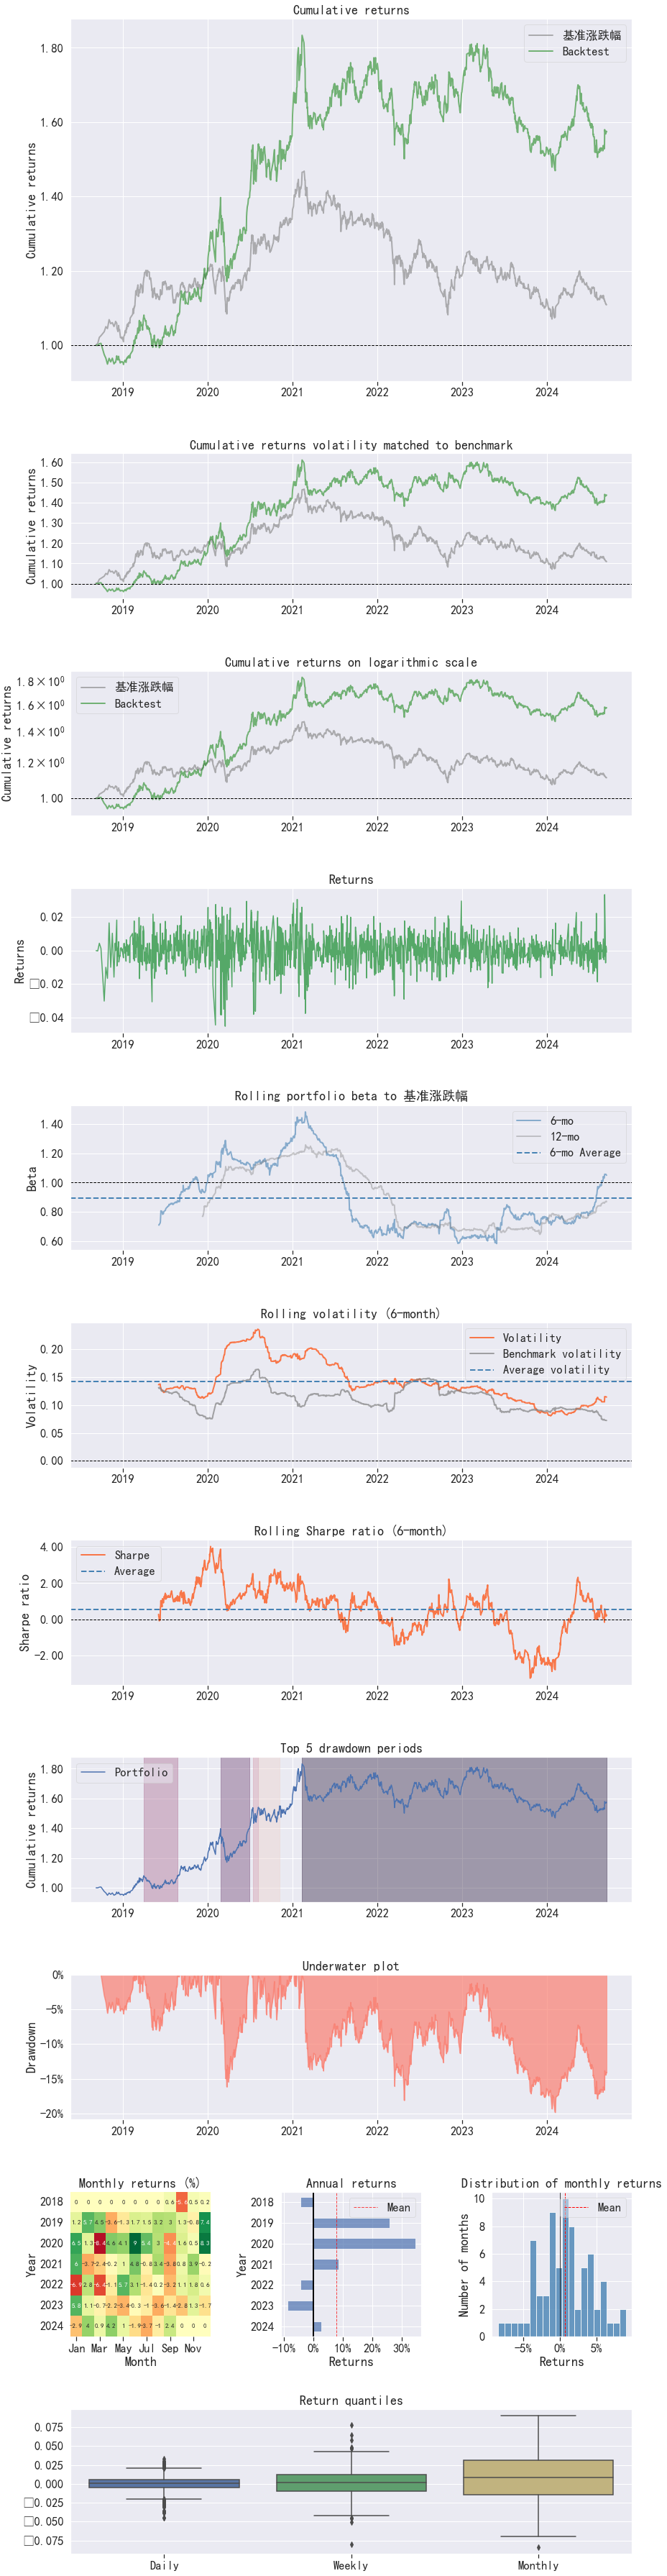

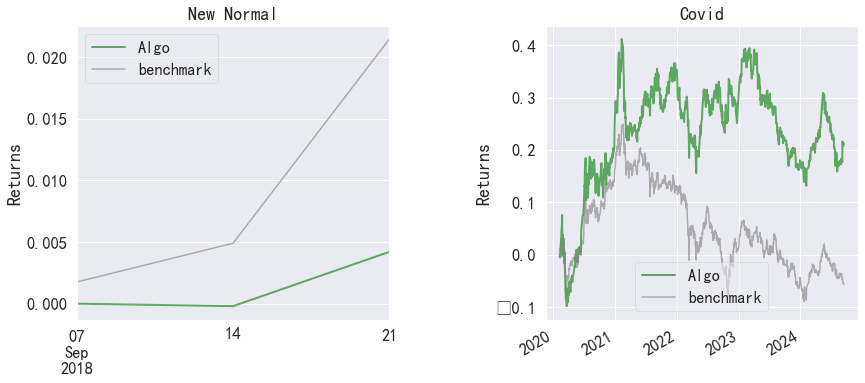

In [27]:
import pyfolio as pf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['Kaitt','SimHei']
pf.tears.create_full_tear_sheet(returns=df_temp1['基金涨跌幅'],benchmark_rets=df_temp1['基准涨跌幅'])

In [28]:
import quantstats as qs
qs.reports.html(returns=df_temp1['基金涨跌幅'],benchmark=df_temp1['基准涨跌幅'])